## Types of Machine Learning Systems

#### Supervised learning

In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels. 
A typical supervised learning task is classification. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called regression. To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices).
 - k-Nearest Neighbors
 - Linear Regression
 - Logistic Regression
 - Support Vector Machines (SVMs)
 - Decision Trees and Random Forests
 - Neural networks

#### Unsupervised learning

In unsupervised learning, as you might guess, the training data is unlabeled. The system tries to learn without a teacher.
 - Clustering
   - k-Means
   - Hierarchical Cluster Analysis (HCA)
   - Expectation Maximization
 - Visualization and dimensionality reduction
   - Principal Component Analysis (PCA)
   - Kernel PCA
   - Locally-Linear Embedding (LLE)
   - distributed Stochastic Neighbor Embedding (t-SNE)
 - Association rule learning
   - Apriori
   - Eclat

For example, say you have a lot of data about your blog’s visitors. You may want to run a clustering algorithm to try to detect groups of similar visitors (Figure 1-8). At no point do you tell the algorithm which group a visitor belongs to: it finds those connections without your help.

Visualization algorithms are also good examples of unsupervised learning algorithms: you feed them a lot of complex and unlabeled data, and they output a 2D or 3D representation of your data that can easily be plotted.

Yet another important unsupervised task is anomaly detection – for example, detecting unusual credit card transactions to prevent fraud, catching manufacturing defects, or automatically removing outliers from a dataset before feeding it to another learning algorithm.

#### Semisupervised learning

Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called semisupervised learning.

Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just one label per person, 4 and it is able to name everyone in every photo, which is useful for searching photos.

#### Reinforcement Learning

Reinforcement Learning is a very different beast. The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return (or penalties in the form of negative rewards). It must then learn by itself what is the best strategy, called a _policy_, to get the most reward over time. 

A policy defines what action the agent should choose when it is in a given situation.
For example, many robots implement Reinforcement Learning algorithms to learn how to walk.

#### Batch learning

In batch learning, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called offline learning.

If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one.


#### Online learning

In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or by small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives. 

Online learning is great for systems that receive data as a continuous flow (e.g., stock prices) and need to adapt to change rapidly or autonomously. It is also a good option if you have limited computing resources: once an online learning system has learned about new data instances, it does not need them anymore, so you can discard them (unless you want to be able to roll back to a previous state and “replay” the data). This can save a huge amount of space.

#### Instance-based learning

Possibly the most trivial form of learning is simply to learn by heart. If you were to create a spam filter this way, it would just flag all emails that are identical to emails that have already been flagged by users – not the worst solution, but certainly not the best.

#### Model-based learning
Another way to generalize from a set of examples is to build a model of these examples, then use that model to make predictions. This is called model-based learning.


### Working with Real Data

1. Look at the big picture
  - __Frame the problem__ : The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. How does the company expect to use and benefit from this model? This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
  - __Select a performance measure__ : Your next step is to select a performance measure. A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions.
  - __Check the Assumptions__ : Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on.
  - __Non-functional aspect__
 
2. Get the data
  - Data can be in structured and/or unstructured form. Fetching data and doing it efficiently is a concept in itself. AKA _extraction_ from the ETL pipeline.

3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor, and maintain your systemS

### Setup

Importing common modules. Using the Python3 as well as Scikit-Learn ≥0.20.

In [85]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
# %matplotlib inline : magic function  only in a Jupyter notebook to draw on screen 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
RESOURCE_DIR = os.path.join(PROJECT_ROOT_DIR, "resource")

def save_fig(fig, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(RESOURCE_DIR, fig + "." + fig_extension)
    print("Saving figure...", fig)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Get the Data

- Download data
- Take a quick look at it, just to get a feel
- Create test set


#### Download data

In [86]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


# Helper method to fetch housing dataset

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [87]:
fetch_housing_data()

In [88]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


#### Take a Quick Look at the Data Structure

In [89]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [90]:
# The info() method is useful to get a quick description of the data, in particular the
# total number of rows, and each attribute’s type and number of non-null values

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [91]:
# Lets have a look at the column with object type data
# You can find out what categories exist and how many elements belong to each category

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [92]:
# The describe() method shows a summary of the numerical attributes
# 
# The std row shows the standard deviation, which measures how dispersed the values are.
# The standard deviation is generally denoted σ (the Greek letter sigma), and it is the 
# square root of the variance, which is how far each number in the set is from the mean 
# (average), and thus from every other number in the set. Variance is given by the average 
# of the squared deviation from the mean. Variance is  When a feature has a bell-shaped 
# normal distribution (also called a Gaussian distribution), which is very common, the 
# “68-95-99.7” rule applies: about 68% of the values fall within 1σ of the mean, 95% within 2σ, 
# and 99.7% within 3σ.
#
# A percentile indicates the value below which a given percentage of observations in a 
# group of observations falls.
#
# Null values can be seen below for the count row

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure... attribute_histogram_plots


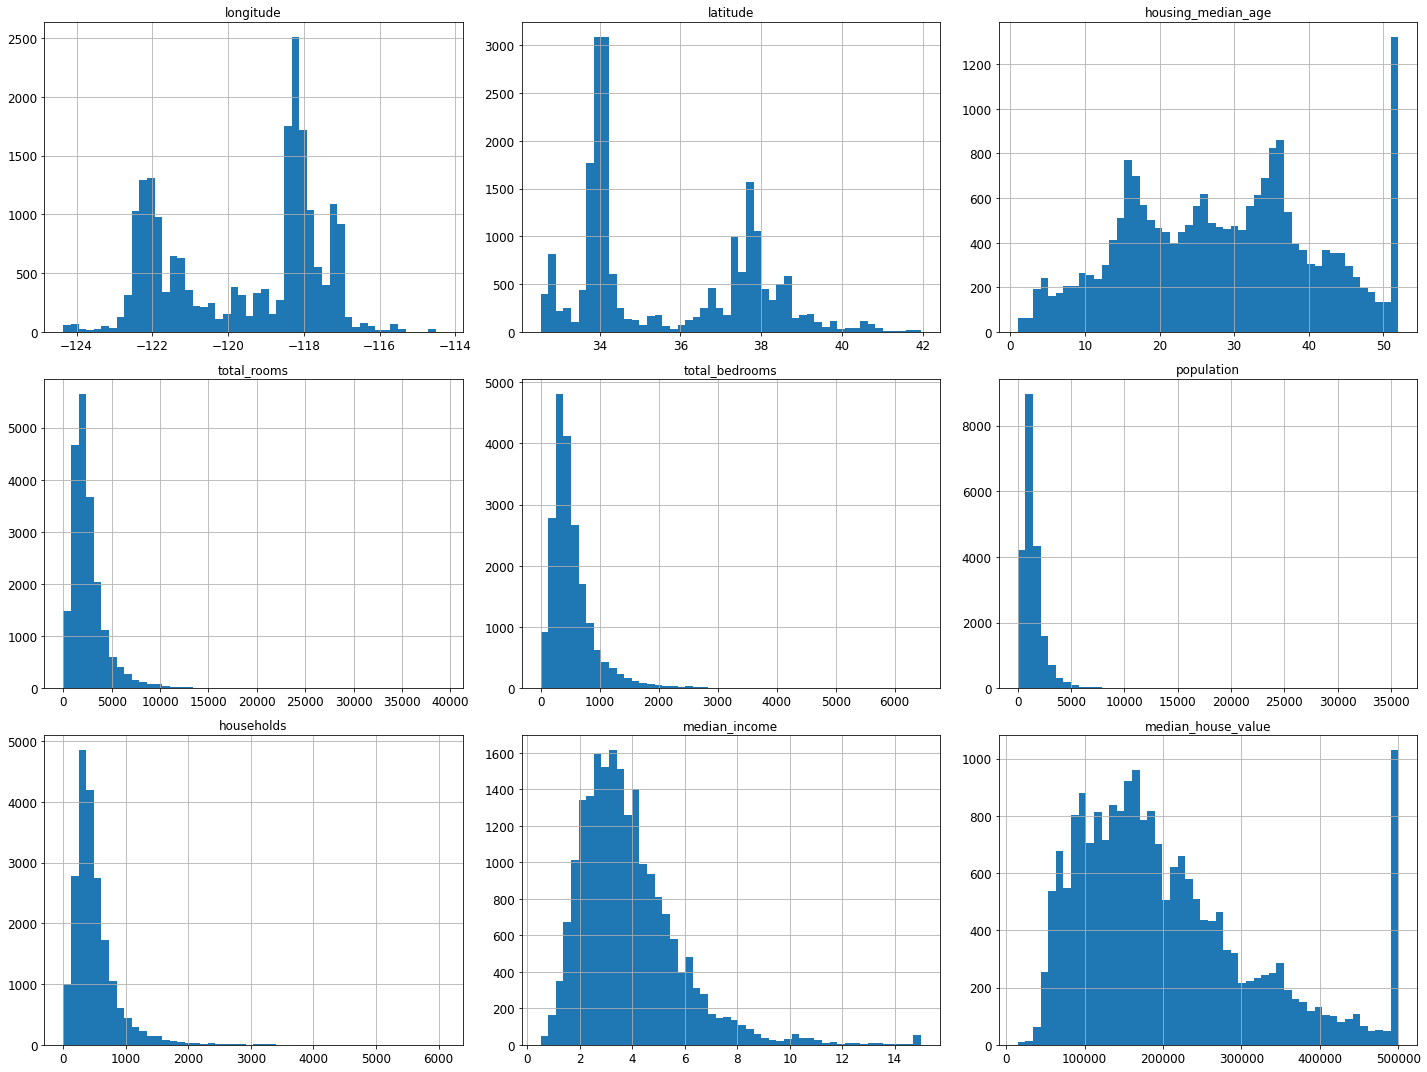

In [93]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()


#### Create a test set


In [94]:
# You will often see people set the random seed to 42. This number has no special property, other than to be
# The Answer to the Ultimate Question of Life, the Universe, and Everything.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [95]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

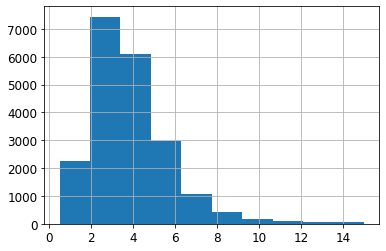

In [96]:
# You may want to ensure that the test set is representative of the various categories 
# of incomes in the whole dataset. Since the median income is a continuous numerical 
# attribute, you first need to create an income category attribute.
#
# most median income values are clustered around $20,000–$50,000, but some median 
# incomes go far beyond $60,000. It is important to have a sufficient number of instances 
# in your dataset for each stratum, or else the estimate of the stratum’s importance may 
# be biased. This means that you should not have too many strata, and each stratum 
# should be large enough.

housing["median_income"].hist()

In [97]:
# create an income category attribute from 0 to 6

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [98]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

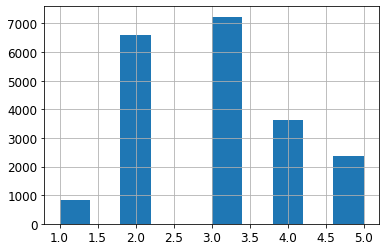

In [99]:
housing["income_cat"].hist()

In [100]:
# Ready to do stratified sampling based on the income category. For this you can use 
# Scikit-Learn’s StratifiedShuffleSplit class.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [101]:
# Let’s see if this worked as expected. You can start by looking at the income 
# category proportions in the test set

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [102]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [103]:
# As you can see, the test set generated using stratified sampling has income category 
# proportions almost identical to those in the full dataset, whereas the test 
# set generated using purely random sampling is quite skewed.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [104]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [105]:
# Now you should remove the income_cat attribute so the data is back to its original state

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)



### Discover and visualize the data to gain insights

- Visualize data
- Looking for correlation
- Experimenting with attribute combination

In [106]:
# Let’s create a copy so you can play with it without harming the training set

housing = strat_train_set.copy()


#### Visualizing Geographical Data

Saving figure... bad_visualization_plot


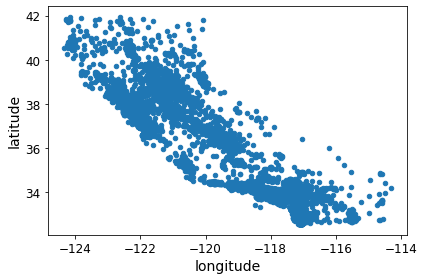

In [107]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure... better_visualization_plot


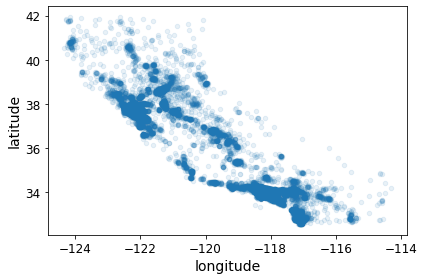

In [108]:
# Setting the alpha option to 0.1 makes it much easier to visualize the places
# where there is a high density of data points, Bay Area and around Los Angeles

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure... housing_prices_scatterplot


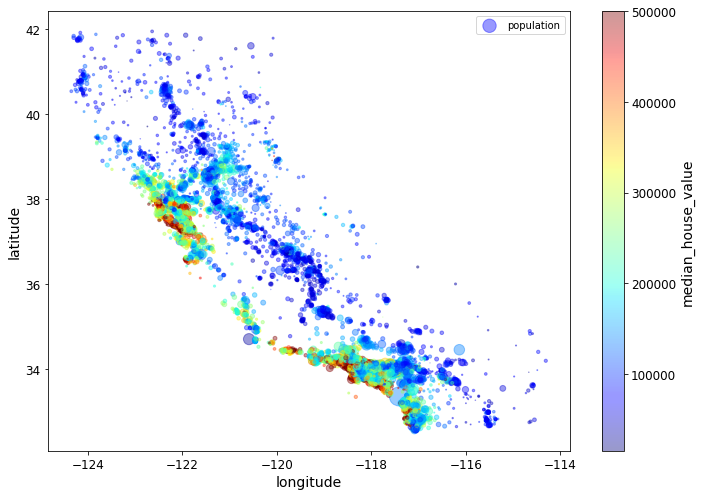

In [109]:
# This image tells you that the housing prices are very much related to the location
# (e.g., close to the ocean) and to the population density, as you probably knew already.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")


#### Looking for Correlations

In [110]:
# Since the dataset is not too large, you can easily compute the standard correlation
# coefficient (also called Pearson’s r, ranges from –1 to 1) between every pair of 
# attributes using the corr()

corr_matrix = housing.corr()

In [111]:
# how much each attribute correlates with the median house value
# 1 mean strong correlation and -1 mean negative correlation and close to 0 means no 
# linear correlation (“if x goes up, then y generally goes up/down”)
#
# you can see a small negative correlation between the latitude and the median 
# house value (i.e., prices have a slight tendency to go down when you go north).


corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


#### Experimenting with Attribute Combinations

In [112]:
# One last thing before feeding data to ML, try out various attribute combinations.
# For example, the total number of rooms in a district is not very useful if you 
# don’t know how many households there are. What you really want is the number 
# of rooms per household. Similarly, the total number of bedrooms by itself is 
# not very useful

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [113]:
# And now let’s look at the correlation matrix again
# The new bedrooms_per_room attribute is much more correlated with the median house value 
# than the total number of rooms or bedrooms. Apparently houses with a lower 
# bedroom/room ratio tend to be more expensive.

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [114]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333




### Prepare the data for machine learning algorithms

- Data cleaning
- Handling text and categorical attributes
- Custom transfermers
- Feature scaling 
- Transformation pipelines


In [115]:
# drop labels for training set
# axis=1 means column wise operation

housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()


#### Data Cleaning


In [116]:
# There could be three option to deal with missing features
# Drop the corresponding null entry
# Drop the entire attribute
# Replace missing values by -> zero, mean, median, etc.
#
# Let's create a copy of the housing dataset to demonstrate

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [117]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [118]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [119]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [120]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [121]:
# To take care of missing value -> Imputer
# First, you need to create an Imputer instance, specifying that you want to replace each 
# attribute’s missing values with the median of that attribute: strategy="median"
# 
# Since the median can only be computed on numerical attributes, we need to create a
# copy of the data without the text attribute ocean_proximity.
# Now you can fit the imputer instance to the training data using the fit() method:
# 
# The imputer has simply computed the median of each attribute and stored the result
# in its statistics_ instance variable. Only the total_bedrooms attribute had missing
# values, but we cannot be sure that there won’t be any missing values in new data after
# the system goes live, so it is safer to apply the imputer to all the numerical attributes

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [122]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [123]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [124]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Check that this is the same as manually computing the median of each attribute:

In [125]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [126]:
# Now you can use this “trained” imputer to transform the training set by replacing
# missing values by the learned median

X = imputer.transform(housing_num)

In [127]:
type(X)

numpy.ndarray

In [128]:
# The result is a plain Numpy array containing the transformed features. If you want to
# put it back into a Pandas DataFrame, it’s simple

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [129]:
# comparable results

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [130]:
imputer.strategy

'median'

In [131]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [132]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964



#### Handling Text and Categorical Attributes


In [133]:
# Now let's preprocess the categorical input feature, `ocean_proximity`
# 
# Earlier we left out the categorical attribute ocean_proximity because it is a text
# attribute so we cannot compute its median

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [134]:
# Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values
# into one-hot vectors.

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [135]:
# After one-hot encoding we get a matrix with thousands of columns, and the matrix is 
# full of zeros except for a single 1 per row. Using up tons of memory mostly to store 
# zeros would be very wasteful, so instead a sparse matrix only stores the location 
# of the nonzero elements. You can use it mostly like a normal 2D array, but if you 
# really want to convert it to a (dense) NumPy array, just call the toarray() method

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [136]:
# Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [137]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]



#### Custom Transformers


In [138]:
# Let's create a custom transformer to add extra attributes:
# Although Scikit-Learn provides many useful transformers, you will need to write
# your own for tasks such as custom cleanup operations or combining specific
# attributes. You will want your transformer to work seamlessly with Scikit-Learn 
# functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not 
# inheritance), all you need is to create a class and implement three methods: fit()
# (returning self ), transform() , and fit_transform() . You can get the last one for
# free by simply adding TransformerMixin as a base class. Also, if you add BaseEstimator 
# as a base class (and avoid *args and **kargs in your constructor) you will get
# two extra methods ( get_params() and set_params() ) that will be useful for automatic 
# hyperparameter tuning. For example, here is a small transformer class that adds the 
# combined attributes we discussed earlier.
# 
# In this example the transformer has one hyperparameter, add_bedrooms_per_room ,
# set to True by default (it is often helpful to provide sensible defaults). This 
# hyperparameter will allow you to easily find out whether adding this attribute helps the
# Machine Learning algorithms or not. More generally, you can add a hyperparameter
# to gate any data preparation step that you are not 100% sure about. The more you
# automate these data preparation steps, the more combinations you can automatically
# try out, making it much more likely that you will find a great combination 
# (and saving you a lot of time).


from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [139]:
# Better way to take column indices

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [140]:
# Also, `housing_extra_attribs` is a NumPy array, we've lost the column names 
# (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, 
# you could run this:

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241




#### Feature scaling


In [141]:
# There are two common ways to get all attributes to have the same scale: min-max
# scaling and standardization.
#
# Min-max scaling (many people call this normalization) is quite simple: values are
# shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting 
# the min value and dividing by the max minus the min. Scikit-Learn provides a
# transformer called MinMaxScaler for this. It has a feature_range hyperparameter
#that lets you change the range if you don’t want 0–1 for some reason.
#
# Standardization is quite different: first it subtracts the mean value (so standardized
# values always have a zero mean), and then it divides by the variance so that the 
# resulting distribution has unit variance. Unlike min-max scaling, standardization 
# does not bound values to a specific range, which may be a problem for some algorithms 
# (e.g., neural networks often expect an input value ranging from 0 to 1). However, 
# standardization is much less affected by outliers. For example, suppose a district 
# had a median income equal to 100 (by mistake). Min-max scaling would then crush all 
# the other values from 0–15 down to 0–0.15, whereas standardization would not be much 
# affected




#### Transformation Pipelines


In [142]:
# As you can see, there are many data transformation steps that need to be executed in
# the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
# such sequences of transformations. Here is a small pipeline for the numerical attributes
#
# The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
# steps. All but the last estimator must be transformers (i.e., they must have a
# fit_transform() method)
#
# The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
# steps. All but the last estimator must be transformers (i.e., they must have a
# fit_transform() method)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [143]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [144]:
# ColumnTransformer apply a specific transform or sequence of transforms to just 
# the numerical columns,  and a separate sequence of transforms to just the categorical 
# columns.

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [145]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [146]:
housing_prepared.shape

(16512, 16)

In [147]:
# For reference, here is the old solution based on a `DataFrameSelector` transformer 
# (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [148]:
# DataFrameSelector will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array. With
# this, you can easily write a pipeline that will take a Pandas DataFrame and handle
# only the numerical values: the pipeline would just start with a DataFrameSelector to
# pick only the numerical attributes, followed by the other preprocessing steps we 
# discussed earlier. And you can just as easily write another pipeline for the categorical
# attributes as well by simply selecting the categorical attributes using a DataFrameSe 
# lector and then applying a CategoricalEncoder.
#
# join all these components into a big pipeline that will preprocess both the 
# numerical and the categorical features

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [149]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [150]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [151]:
# The old and new dataframes are the same!!!!

np.allclose(housing_prepared, old_housing_prepared)

True



### Select and train a model

- Training and evaluating on the training set
- Better evaluation using cross validation




#### Training and evaluating on the training set


In [152]:
# train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [153]:
# let's try the full preprocessing pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [154]:
# Compare against the actual values

print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [155]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [156]:
# Let’s measure this regression model’s RMSE on the whole training set using 
# Scikit-Learn’s mean_squared_error function
#
# median_housing_values range between $120,000 and $265,000, so a typical predic‐
# tion error of $68,628 is not very satisfying. This is an example of a model underfitting
# the training data. When this happens it can mean that 
#
# --> the features do not provide enough information to make good predictions, 
# --> or that the model is not powerful enough. 
# --> the main ways to fix underfitting are to select a more powerful model, 
# --> to feed the training algorithm with better features, 
# --> or to reduce the constraints on the model. 
#
# This model is not regularized, so this rules out the last option.

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [157]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915802

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [159]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0



#### Better evaluation using cross validation


In [160]:
# One way to evaluate the Decision Tree model would be to use the train_test_split
# function to split the training set into a smaller training set and a validation set, then
# train your models against the smaller training set and evaluate them against the 
# validation set.
#
# A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
# performs K-fold cross-validation: it randomly splits the training set into 10 distinct
# subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
# picking a different fold for evaluation every time and training on the other 9 folds.
# The result is an array containing the 10 evaluation scores

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [161]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [162]:
# The Decision Tree model is overfitting so badly that it performs worse than 
# the Linear Regression model.
# From 0 error above to approximately 71,379 in the validation set

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [163]:
# Let’s try one last model. Random Forests work by training many Decision Trees 
# on random subsets of the features, then averaging out their predictions. 
# Building a model on top of many other models is called Ensemble Learning
# 
# specify `n_estimators=100` to be future-proof since the default value is 100

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [164]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [165]:
# Random Forests look very promising. However, note that
# the score on the training set is still much lower than on the validation sets, meaning
# that the model is still overfitting the training set. Possible solutions for 
# overfitting are to simplify the model, constrain it (i.e., regularize it), 
# or get a lot more training data.

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [166]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [168]:
# And one more model :D 
# Most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR.
# A kernel helps us find a hyperplane in the higher dimensional space without increasing the 
# computational cost. Usually, the computational cost will increase if the dimension of the 
# data increases. This increase in dimension is required when we are unable to find a separating 
# hyperplane in a given dimension and are required to move in a higher dimension


from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968



### Fine-tune your model

- After shortlisting few models that looked promising, fine tuning is needed
- Fine tuning is nothing but hyperparameters tuning


#### Grid search

In [170]:
# One way to do that would be to fiddle with the hyperparameters manually, until you
# find a great combination of hyperparameter values. This would be very tedious work,
# and you may not have time to explore many combinations.

# Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to
# do is tell it which hyperparameters you want it to experiment with, and what values to
# try out, and it will evaluate all the possible combinations of hyperparameter values,
# using cross-validation. For example, the following code searches for the best combi‐
# nation of hyperparameter values for the RandomForestRegressor.


from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6=18)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
# Should use the model with these parameters.
# The search treat some of the data preparation steps as hyperparameters. It will 
# automatically find out whether or not to add a feature or to automatically find the best 
# way to handle outliers, missing features, feature selection, etc.


grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [173]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [175]:
# To see the entire search result


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1



#### Randomized search


In [182]:
# When the search space is large, this method is used. Instead of trying out all 
# possible combinations, it evaluates a given number of random combinations by 
# selecting a random value.


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff068b89d60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff068b89c40>},
                   random_state=42, scoring='neg_mean_squared_error')

In [183]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}




### Evaluate system on the Test Set


In [184]:
# Once you have a system that performs sufficiently well. Now is the time to evaluate 
# the final model on the test set.


final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)  # call transform() not fit_transform()
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)